<a href="https://colab.research.google.com/github/LaiTechTinker/LLMpract/blob/master/LLM_tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
# filepath=drive.mount('/content/drive/My Drive/LLM_pract/the-verdict.txt')
drive.mount('/content/drive')
# real_Path=drive.mount(filepath)
# with open(real_Path,'r',encoding='utf-8') as f:
#  text=f.read()
# print(text)

Mounted at /content/drive


In [ ]:
filepath='/content/drive/My Drive/LLM_pract/the-verdict.txt'
with open(filepath,'r',encoding='utf-8') as f:
  text=f.read()
print(len(text))

20479


In [ ]:
print(text[:99])

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [ ]:
# import re
# re_text="hello, world. This i a text"
# result=re.split(r'([,.]\s)',re_text)
# new_result=[item.strip() for item in result]
# print(result)
# print(new_result)

In [ ]:
# result=re.split(r'([,.?-_!:"\']\s)',text)
# new_result=[item.strip() for item in result]
# print(new_result[:120])

In [ ]:
import re
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
preprocessed = [item.strip() for item in result if item.strip()]
print(preprocessed[:100])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--']


In [ ]:
print(len(preprocessed))

4690


In [ ]:
allwords=sorted(set(preprocessed))
print(len(allwords))

1130


In [ ]:
vocab={word:index for index,word in enumerate(allwords)}
for i,word in enumerate(vocab.items()):
  print(word)
  if i ==50:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [ ]:
class Tokenizer:
  def __init__(self,vocab):
    self.str_to_int=vocab
    self.int_to_str={i:s for s,i in vocab.items()}
  def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids=[]
        for s in preprocessed:
          if s not in self.str_to_int:
            continue
          ids.append(self.str_to_int[s])
        return ids

  def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [ ]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [ ]:
len(vocab.items())

1132

In [ ]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [ ]:
class tokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed # the <unk> will be unknown with the largest integer
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        # return text(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [ ]:
tokenizer = Tokenizer(vocab)

text = """"It's the last he painted, you know,"
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [ ]:
tokenizer = tokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [ ]:
tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [ ]:
ids = tokenizer.encode(text)
tokenizer.decode(ids)

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

In [ ]:
import tiktoken
tokenizer=tiktoken.get_encoding("gpt2")


In [ ]:
text=("hello, do you like tea?<|endoftext|> In the sunlit terrace""of someunlnowpalce")
ids=tokenizer.encode(text,allowed_special={"<|endoftext|>"})
strings=tokenizer.decode(ids)
print(ids)
print(strings)

[31373, 11, 466, 345, 588, 8887, 30, 50256, 554, 262, 4252, 18250, 8812, 558, 1659, 617, 403, 75, 2197, 18596, 344]
hello, do you like tea?<|endoftext|> In the sunlit terraceof someunlnowpalce


In [ ]:
import tiktoken
enc = tiktoken.get_encoding("o200k_base")
ids=enc.encode(text,allowed_special={"<|endoftext|>"})
print(ids)



[24912, 11, 621, 481, 1299, 17966, 30, 199999, 730, 290, 7334, 32758, 51551, 1440, 1236, 373, 2943, 384, 18413, 400]


Creating input target pairs


In [ ]:
with open(filepath,'r',encoding="utf-8") as f:
  text=f.read()
enc_text=enc.encode(text,allowed_special={"<|endoftext|>"})
print(len(enc_text))


4836


In [ ]:
enc_sample=enc_text[50:]
print(enc_sample)

[11166, 306, 261, 38350, 402, 290, 123397, 13, 350, 52861, 357, 7542, 4525, 480, 1481, 679, 1339, 27388, 503, 62520, 16803, 30289, 4679, 328, 1232, 40373, 150535, 14116, 673, 1412, 290, 5142, 4358, 480, 13, 357, 665, 9598, 31127, 13, 183881, 263, 748, 3964, 375, 38520, 2174, 16864, 86581, 375, 613, 528, 7443, 1232, 537, 8218, 562, 65927, 4598, 13, 392, 2566, 4165, 4275, 2966, 316, 4952, 290, 1432, 328, 922, 8723, 461, 3499, 869, 26, 889, 357, 4128, 2411, 328, 484, 11, 9655, 13, 41767, 6595, 375, 3086, 6266, 316, 16880, 83, 382, 722, 357, 2411, 328, 3692, 623, 2195, 11, 402, 31127, 13, 748, 3964, 885, 36968, 11, 118583, 1617, 1175, 6435, 62, 472, 5495, 1023, 1504, 45264, 306, 448, 34768, 22932, 328, 62971, 13, 1958, 480, 673, 625, 1606, 290, 31127, 13, 748, 86, 963, 1218, 116720, 295, 13, 32183, 625, 290, 67557, 39779, 535, 25186, 826, 11, 540, 290, 2174, 499, 4055, 263, 28360, 2356, 11, 18145, 668, 2254, 165003, 33750, 885, 392, 97198, 2469, 39961, 1, 316, 2891, 11, 483, 37095, 306, 13

In [ ]:
import torch
from torch.utils.data import Dataset,DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [ ]:
def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(text, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [ ]:
print("PyTorch version:", torch.__version__)
dataloader = create_dataloader_v1(
    text, batch_size=4, max_length=8, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version: 2.6.0+cu124
[tensor([[   40,   367,  2885,  1464,  1807,  3619,   402,   271],
        [  367,  2885,  1464,  1807,  3619,   402,   271, 10899],
        [ 2885,  1464,  1807,  3619,   402,   271, 10899,  2138],
        [ 1464,  1807,  3619,   402,   271, 10899,  2138,   257]]), tensor([[  367,  2885,  1464,  1807,  3619,   402,   271, 10899],
        [ 2885,  1464,  1807,  3619,   402,   271, 10899,  2138],
        [ 1464,  1807,  3619,   402,   271, 10899,  2138,   257],
        [ 1807,  3619,   402,   271, 10899,  2138,   257,  7026]])]


In [ ]:
dataloader = create_dataloader_v1(text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [ ]:
import torch
from torch.nn import Linear

In [ ]:
vocab_ids=torch.tensor([2,3,5,6])
vocab_size=6
feature_dim=4
torch.manual_seed(123)
embedded_layer=torch.nn.Embedding(vocab_size,feature_dim)
print(embedded_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.3035, -0.5880],
        [ 0.3486,  0.6603, -0.2196, -0.3792],
        [-0.1606, -0.4015,  0.6957, -1.8061],
        [ 1.8960, -0.1750,  1.3689, -1.6033],
        [-0.7849, -1.4096, -0.4076,  0.7953],
        [ 0.9985,  0.2212,  1.8319, -0.3378]], requires_grad=True)


In [ ]:
print(embedded_layer(torch.tensor([2])))

tensor([[-0.1606, -0.4015,  0.6957, -1.8061]], grad_fn=<EmbeddingBackward0>)


In [ ]:
vocab_size2=50257
feature_dim2=256
embeded_layer2=torch.nn.Embedding(vocab_size2,feature_dim2)
print(embeded_layer2.weight.shape)


torch.Size([50257, 256])


In [ ]:
max_length = 4
dataloader = create_dataloader_v1(
    text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [ ]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [ ]:
token_embedding=embeded_layer2(inputs)
print(token_embedding.shape)

torch.Size([8, 4, 256])


In [ ]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, feature_dim2)

In [ ]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [ ]:
input_embeddings = token_embedding + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


ATTENTION MACHANISM CODE IMPLEMENTATION


In [2]:
import torch
import torch.nn as nn
import numpy as np

inputs=torch.tensor([
    [0.43, 0.15, 0.89], # Your (x^1)
[0.55, 0.87, 0.66], # journey (x^2)
[0.57, 0.85, 0.64], # starts (x^3)
[0.22, 0.58, 0.33], # with (x^4)
[0.77, 0.25, 0.10], # one (x^5)
[0.05, 0.80, 0.55]# step (x^6)
])
query=inputs[1]
attention_score=torch.empty(inputs.shape[0])# this set attention_scores to empty
for i,values in enumerate(inputs):
    attention_score[i]=torch.dot(values,query)
sum=attention_score.sum()
print(sum)

tensor(6.5617)


In [3]:
#the next step is to make our attention weights to sum up to 1
#we can use this simple approach of summing the weights then dividing them by the sum
normalized=attention_score/sum
print(normalized)

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])


In [4]:
#the above approach may not be good so we are going to use the softmax approach
new_normaized=torch.softmax(attention_score,dim=0)
print(new_normaized)

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])


In [5]:
#the next step is to compute context vector
import torch
context_vectors=torch.zeros(inputs.shape[1])
for i,values in enumerate(inputs):
  context_vectors+=new_normaized[i]*values
print(context_vectors)


tensor([0.4419, 0.6515, 0.5683])


In [6]:
context_vector=torch.zeros(6,3)
attention_scores=torch.empty(6,6)
#first computes attention score for each query
for i,values in enumerate(inputs):
  for j,values2 in enumerate(inputs):
    attention_scores[i,j]=torch.dot(values,values2)
print(attention_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [7]:
normalized_attn=torch.softmax(attention_scores,dim=1)
print(normalized_attn)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [8]:
#then we compute the context vector
all_context_vector=normalized_attn@inputs
print(all_context_vector)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


SELF ATTENTION WITH TRAINABLE WEIGHTS


In [9]:
d_in=3
d_out=2
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [10]:
x_2=inputs[1]
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


In [11]:
keys = inputs @ W_key
values = inputs @ W_value
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [12]:
keys_2 = keys[1] #A
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [13]:
attn_scores_2 = query_2 @ keys.T # All attention scores for given query
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [14]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [15]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


In [16]:
#self attention ith python class
import torch.nn as nn
class SelfAttention_v1(nn.Module):
 def __init__(self, d_in, d_out):
  super().__init__()
  self.d_out = d_out
  self.W_query = nn.Parameter(torch.rand(d_in, d_out))
  self.W_key = nn.Parameter(torch.rand(d_in, d_out))
  self.W_value = nn.Parameter(torch.rand(d_in, d_out))
 def forward(self, x):
  keys = x @ self.W_key
  queries = x @ self.W_query
  values = x @ self.W_value
  attn_scores = queries @ keys.T # omega
  attn_weights = torch.softmax(
  attn_scores / keys.shape[-1]**0.5, dim=-1)
  context_vec = attn_weights @ values
  return context_vec

In [17]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [18]:
#self attention class using pytorch module
class SelfAttention_v2(nn.Module):
 def __init__(self, d_in, d_out, qkv_bias=False):
  super().__init__()
  self.d_out = d_out
  self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
  self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
  self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
 def forward(self, x):
  keys = self.W_key(x)
  queries = self.W_query(x)
  values = self.W_value(x)
  attn_scores = queries @ keys.T
  attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
  context_vec = attn_weights @ values
  return context_vec

In [19]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


CASUAL ATTENTION MECHANISIM


In [20]:
queries = sa_v2.W_query(inputs) #A
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [21]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [22]:
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [23]:
row_sums = masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


In [24]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [25]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [26]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) #A
example = torch.ones(6, 6) #B
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [27]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.3331, 0.0000]],
       grad_fn=<MulBackward0>)


In [28]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [29]:
class CausalAttention(nn.Module):
 def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
  super().__init__()
  self.d_out = d_out
  self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
  self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
  self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
  self.dropout = nn.Dropout(dropout) #A
  self.register_buffer(
   'mask',
   torch.triu(torch.ones(context_length, context_length),
   diagonal=1)) #B
 def forward(self, x):
  b, num_tokens, d_in = x.shape #C
  keys = self.W_key(x)
  queries = self.W_query(x)
  values = self.W_value(x)
  attn_scores = queries @ keys.transpose(1, 2) #C
  attn_scores.masked_fill_( #D
  self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
  attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
  attn_weights = self.dropout(attn_weights)
  context_vec = attn_weights @ values
  return context_vec

In [30]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


MULTIHEAD ATTENTION CLASS

In [33]:
class MultiHeadAttentionWrapper(nn.Module):
 def __init__(self, d_in, d_out, context_length,
 dropout, num_heads, qkv_bias=False):
  super().__init__()
  self.heads = nn.ModuleList(
[CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
for _ in range(num_heads)]
)
 def forward(self, x):
  return torch.cat([head(x) for head in self.heads], dim=-1)

In [34]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


In [36]:
class MultiHeadAttention(nn.Module):
 def __init__(self, d_in, d_out,
context_length, dropout, num_heads, qkv_bias=False):
  super().__init__()
  assert d_out % num_heads == 0, "d_out must be divisible by num_heads"
  self.d_out = d_out
  self.num_heads = num_heads
  self.head_dim = d_out // num_heads #A
  self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
  self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
  self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
  self.out_proj = nn.Linear(d_out, d_out) #B
  self.dropout = nn.Dropout(dropout)
  self.register_buffer(
'mask',
torch.triu(torch.ones(context_length, context_length), diagonal=1)
)
 def forward(self, x):
  b, num_tokens, d_in = x.shape
  keys = self.W_key(x) #C
  queries = self.W_query(x) #C
  values = self.W_value(x) #C
  keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) #D
  values = values.view(b, num_tokens, self.num_heads, self.head_dim) #D
  queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)#D
  keys = keys.transpose(1, 2) #E
  queries = queries.transpose(1, 2) #E
  values = values.transpose(1, 2) #E
  attn_scores = queries @ keys.transpose(2, 3) #F
  mask_bool = self.mask.bool()[:num_tokens, :num_tokens] #G
  attn_scores.masked_fill_(mask_bool, -torch.inf) #H
  attn_weights = torch.softmax(
  attn_scores / keys.shape[-1]**0.5, dim=-1)
  attn_weights = self.dropout(attn_weights)
  context_vec = (attn_weights @ values).transpose(1, 2) #I
#J
  context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
  context_vec = self.out_proj(context_vec) #K
  return context_vec

In [37]:
GPT_CONFIG_124M = {
"vocab_size": 50257, # Vocabulary size
"context_length": 1024, # Context length
"emb_dim": 768, # Embedding dimension
"n_heads": 12, # Number of attention heads
"n_layers": 12, # Number of layers
"drop_rate": 0.1, # Dropout rate
"qkv_bias": False # Query-Key-Value bias
}

LAYER NORMALIZATION OF CODINNG GPT FROM SCRATCH


In [38]:
import torch
import torch.nn as nn
torch.manual_seed(123)
batch_example=torch.randn(2,5)
layers=nn.Sequential(nn.Linear(5,8),nn.ReLU())
output=layers(batch_example)
print(output)

tensor([[0.1377, 0.6193, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2500],
        [0.1251, 0.5118, 0.0000, 0.0460, 0.2094, 0.1350, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)


In [41]:
mean=torch.mean(output,dim=-1,keepdim=True)
var=torch.var(output,dim=-1,keepdim=True)
print(mean)
print(var)

tensor([[0.1259],
        [0.1284]], grad_fn=<MeanBackward1>)
tensor([[0.0483],
        [0.0300]], grad_fn=<VarBackward0>)


In [42]:
output_norm=(output-mean)/torch.sqrt(var)
print(output_norm)

tensor([[ 0.0540,  2.2447, -0.5727, -0.5727, -0.5727, -0.5727, -0.5727,  0.5646],
        [-0.0193,  2.2141, -0.7417, -0.4761,  0.4679,  0.0383, -0.7417, -0.7417]],
       grad_fn=<DivBackward0>)


In [44]:
mean=output_norm.mean(dim=-1,keepdim=True,)
var=output_norm.var(dim=-1,keepdim=True)
torch.set_printoptions(sci_mode=False)
print(mean)
print(var)

tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
tensor([[1.],
        [1.]], grad_fn=<VarBackward0>)


In [46]:
class Layer_norm(nn.Module):
  def __init__(self,emb_dim):
    super().__init__()
    self.eps=1e-5
    self.scale=nn.Parameter(torch.ones(emb_dim))
    self.shift=nn.Parameter(torch.zeros(emb_dim))
  def forward(self,x):
    mean=x.mean(dim=-1,keepdim=True)
    var=x.var(dim=-1,keepdim=True,unbiased=False)
    x_norm=(x-mean)/torch.sqrt(var+self.eps)
    return self.scale*x_norm+self.shift



In [47]:
ln=Layer_norm(emb_dim=5)
output_norm=ln.forward(batch_example)
print(output_norm)

tensor([[ 0.5528,  1.0693, -0.0223,  0.2656, -1.8654],
        [ 0.9087, -1.3767, -0.9564,  1.1304,  0.2940]], grad_fn=<AddBackward0>)


In [48]:
mean=output_norm.mean(dim=-1,keepdim=True,)
var=output_norm.var(dim=-1,keepdim=True)
torch.set_printoptions(sci_mode=False)
print(mean)
print(var)

tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
tensor([[1.2499],
        [1.2500]], grad_fn=<VarBackward0>)


IMPLEMENTING FEED FORWARD WITH GELU ACTIVATION FUNCTION

In [60]:
#NOTE:GELU FORMULAR= 0.5*X*(1+tanh[sqr(2/pi)*(x+0.044715*x^3)])
class GELU(nn.Module):
  def __init__(self,):
    super().__init__()
  def forward(self,x):
    out=0.5*x*(1+torch.tanh(torch.sqrt(torch.tensor(2/torch.pi))*(x+0.044715*torch.pow(x,3))))
    return out

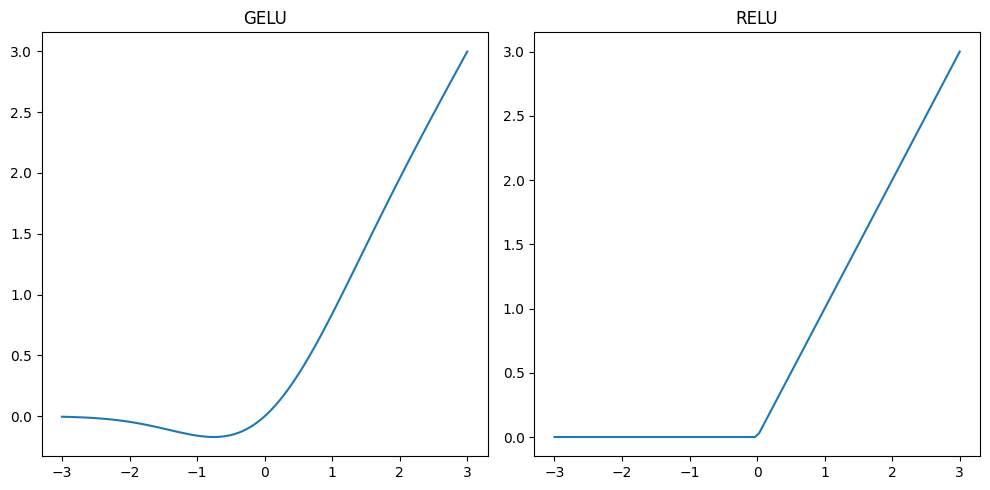

In [61]:
import matplotlib.pyplot as plt
gelu,relu=GELU(),nn.ReLU()
x=torch.linspace(-3,3,100)
#torch.linspace creates  1D tensor like a list linspace means the number are evenly space between the starting and end(-3,3) and then 100 point between them
out_gelu,out_relu=gelu(x),relu(x)
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0].plot(x,out_gelu)
axes[0].set_title("GELU")
axes[1].plot(x,out_relu)
axes[1].set_title("RELU")
plt.tight_layout()
plt.show()

In [62]:
class FeedForward(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    self.layers=nn.Sequential(nn.Linear(cfg["emb_dim"],4*cfg["emb_dim"]),GELU(),nn.Linear(4*cfg["emb_dim"],cfg["emb_dim"]))
  def forward(self,X):
    return self.layers(X)


In [63]:
word_class=FeedForward(GPT_CONFIG_124M)
torch.manual_seed(123)
x=torch.randn(2,3,768)
print(word_class.forward(x).shape)

torch.Size([2, 3, 768])


WHole Transformer block

In [69]:
class TransformerBlock(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    self.attn=MultiHeadAttention(cfg["emb_dim"],cfg["emb_dim"],cfg["context_length"],cfg["drop_rate"],cfg["n_heads"],cfg["qkv_bias"])
    self.ff=FeedForward(cfg)
    self.ln1=Layer_norm(cfg["emb_dim"])
    self.ln2=Layer_norm(cfg["emb_dim"])
    self.dropout=nn.Dropout(cfg["drop_rate"])
  def forward(self,x):
    shortcut=x
    x=self.ln1(x)
    x=self.attn(x)
    x=self.dropout(x)
    x=x+shortcut
    shortcut=x
    x=self.ln2(x)
    x = self.ff(x)
    x = self.dropout(x)
    x = x + shortcut #C
    return x

In [70]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768)
block=TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


In [73]:
class GPTModel(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    self.token_embedding=nn.Embedding(cfg["vocab_size"],cfg["emb_dim"])
    self.pos_embedding=nn.Embedding(cfg["context_length"],cfg["emb_dim"])
    self.drop_embd=nn.Dropout(cfg["drop_rate"])
    self.trf_blocks=nn.Sequential(*[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
    self.final_ln=Layer_norm(cfg["emb_dim"])
    self.out_head=nn.Linear(cfg["emb_dim"],cfg["vocab_size"])
  def forward(self, in_idx):
   batch_size, seq_len = in_idx.shape
   tok_embeds = self.token_embedding(in_idx)

   pos_embeds = self.pos_embedding(torch.arange(seq_len, device=in_idx.device))
   x = tok_embeds + pos_embeds
   x = self.drop_embd(x)
   x = self.trf_blocks(x)
   x = self.final_ln(x)
   logits = self.out_head(x)
   return logits


In [80]:
inputs = torch.tensor([
    [1, 2, 3, 4],   # "your journey starts now"
    [5, 6, 7, 1],   # "one step with your"
    [2, 3, 5, 6]    # "journey starts one step"
], dtype=torch.long)

torch.manual_seed(123)
model=GPTModel(GPT_CONFIG_124M)
out=model(inputs)
print(out.shape)
print(inputs.shape)
print(out)

torch.Size([3, 4, 50257])
torch.Size([3, 4])
tensor([[[ 0.3452, -0.3455, -0.4008,  ...,  0.0106,  0.3169, -0.6635],
         [-0.0067, -0.0506, -0.1330,  ..., -1.0268, -0.4813, -0.6001],
         [ 1.1256,  0.3055,  0.4729,  ...,  0.2663, -0.1870, -0.5688],
         [-0.6487, -0.7881,  0.2156,  ...,  1.0692, -0.6893,  0.5354]],

        [[-0.0656,  0.0789,  0.0397,  ...,  0.1924,  0.6326, -0.2203],
         [ 0.3654,  0.0700,  0.7645,  ..., -0.6925,  0.4689, -0.0576],
         [ 1.5007,  0.5435,  0.8134,  ...,  0.8527, -0.2737,  0.4322],
         [ 0.3570,  0.1937, -0.1039,  ...,  1.0214,  0.2061, -0.0795]],

        [[ 0.0624, -0.2568,  0.0322,  ..., -0.0175, -0.1768, -1.2995],
         [ 0.1910, -0.4317,  0.2615,  ...,  0.4455,  0.2622, -0.1428],
         [ 1.2842,  0.6724,  0.4588,  ...,  0.2005, -0.0030, -0.0221],
         [ 0.0431, -0.3880,  0.1410,  ...,  0.7039, -0.3625,  0.1634]]],
       grad_fn=<ViewBackward0>)
